In [1]:
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid
from torchvision.transforms.functional import to_pil_image
from dataset_builder import SchoolRasterSketchDataset  # Update with your file name
import random
import os
from transformers import AutoTokenizer

/home/athiwat/.conda/envs/athiwat_controlnet/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Instantiate dataset with augmentations
dataset = SchoolRasterSketchDataset(
        tokenizer= AutoTokenizer.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", subfolder="tokenizer"),
        pair_from_to=(2,1),
        augment=True
    )

# Check total samples
print("Total samples:", len(dataset))


BuildingSketchDataset initialized with source LOD: 2, target LOD: 1, resolution: 512, augment: True
Prompt: simplified architectural scribble, crisp black strokes, pure white background, no colours, no shading, no gradients, no windows no doors, no details
Processed 43 with 10836 pairs.
Total samples: 10836


data range source: 0.0 - 1.0 | target: -1.0 - 1.0
source_np shape: (512, 512, 3) | target_np shape: (512, 512, 3)
source_np range: 0.0 - 1.0 | target_np range: 0.0 - 1.0
data range source: 0.0 - 1.0 | target: -1.0 - 1.0
source_np shape: (512, 512, 3) | target_np shape: (512, 512, 3)
source_np range: 0.0 - 1.0 | target_np range: 0.0 - 1.0
data range source: 0.0 - 1.0 | target: -1.0 - 1.0
source_np shape: (512, 512, 3) | target_np shape: (512, 512, 3)
source_np range: 0.0 - 1.0 | target_np range: 0.0 - 1.0
data range source: 0.0 - 1.0 | target: -1.0 - 1.0
source_np shape: (512, 512, 3) | target_np shape: (512, 512, 3)
source_np range: 0.0 - 1.0 | target_np range: 0.0 - 1.0
data range source: 0.0 - 1.0 | target: -1.0 - 1.0
source_np shape: (512, 512, 3) | target_np shape: (512, 512, 3)
source_np range: 0.0 - 1.0 | target_np range: 0.0 - 1.0
data range source: 0.0 - 1.0 | target: -1.0 - 1.0
source_np shape: (512, 512, 3) | target_np shape: (512, 512, 3)
source_np range: 0.0 - 1.0 | target_

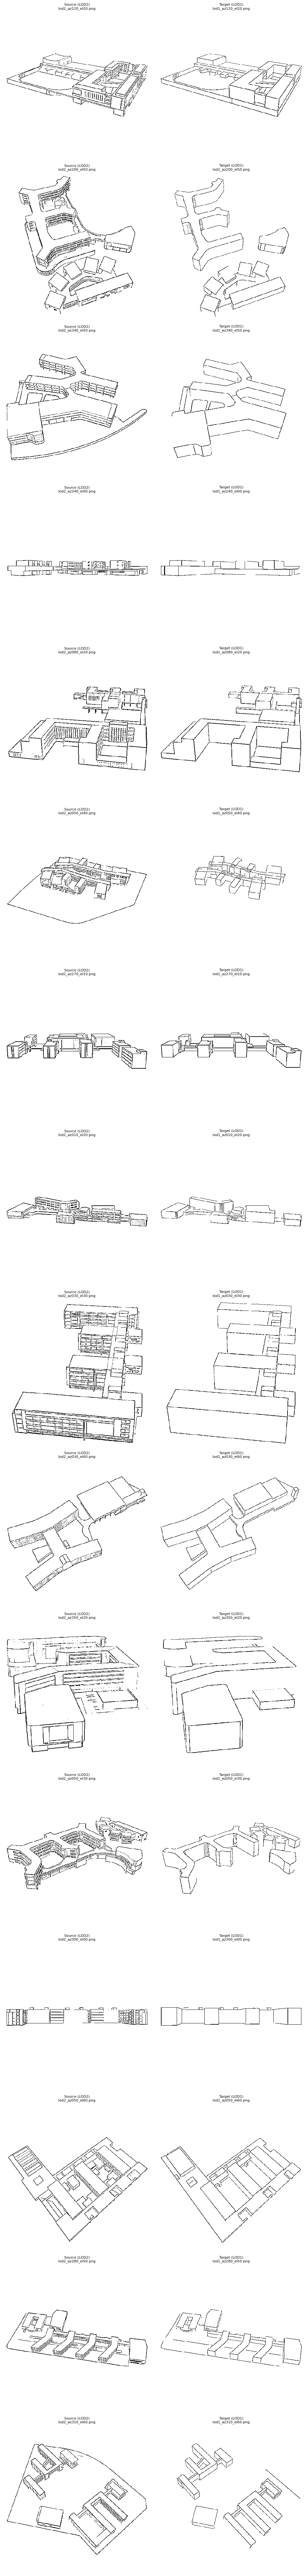

In [4]:
import matplotlib.pyplot as plt

# Desired resolution per subplot
img_size = 512
dpi = 100
figsize = (2 * img_size / dpi, 16 * img_size / dpi)  # (width, height) in inches

# Randomly sample 16 pairs
indices = random.sample(range(len(dataset)), 16)
samples = [dataset[i] for i in indices]
paths = [dataset.image_pairs[i] for i in indices]

# Create figure
fig, axes = plt.subplots(nrows=16, ncols=2, figsize=figsize, dpi=dpi)

for row, (sample, (src_path, tgt_path)) in enumerate(zip(samples, paths)):
    source_img = sample["conditioning_pixel_values"]
    target_img = sample["pixel_values"]
    print(f"data range source: {source_img.min()} - {source_img.max()} | target: {target_img.min()} - {target_img.max()}")

    
    #souce is already normalized to [0,1]
    source_np = source_img.permute(1, 2, 0).numpy()
    # Denormalize from [-1, 1] to [0, 1]
    target_np = ((target_img.permute(1, 2, 0).numpy() + 1) / 2).clip(0, 1)
    print(f"source_np shape: {source_np.shape} | target_np shape: {target_np.shape}")
    print(f"source_np range: {source_np.min()} - {source_np.max()} | target_np range: {target_np.min()} - {target_np.max()}")
    
    # Plot with no interpolation (keeps crisp lines)
    axes[row, 0].imshow(source_np, interpolation='nearest')
    axes[row, 0].set_title(f"Source (LOD{dataset.source_lod})\n{os.path.basename(src_path)}", fontsize=8)
    axes[row, 0].axis("off")

    axes[row, 1].imshow(target_np, interpolation='nearest')
    axes[row, 1].set_title(f"Target (LOD{dataset.target_lod})\n{os.path.basename(tgt_path)}", fontsize=8)
    axes[row, 1].axis("off")

plt.tight_layout()
plt.show()
